In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [3]:
file_train = "./train.csv"
file_test = "./test.csv"

df_train = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)

df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [23]:
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (1235, 30)
Test shape :  (824, 29)


In [5]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [7]:
# df_shuffled = df.sample(frac=1)

# df_shuffled.head()

df_train['source'] = ["Train"]*len(df_train)
df_test['source'] = ["Test"]*len(df_test)

In [20]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df.tail()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,source
2054,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,None,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes,NaN,Test
2055,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no,NaN,Test
2056,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no,NaN,Test
2057,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,None,49.0,8.6,clear,5.0,no,3111,0,0,yes,NaN,Test
2058,2058,yes,adult,528461,38.1,66.0,12.0,cold,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,more_1_liter,2.0,absent,distend_small,31.5,6.2,None,1.6,yes,2205,0,0,yes,NaN,Test


In [15]:
one_hot_columns = []

for column in df_train.columns:
    # print(column, df[column].dtype)
    if df_train[column].dtype is np.dtype("object") and column not in ["outcome", "source"]:
        print(column, df_train[column].unique())    
        one_hot_columns.append(column)

print(one_hot_columns)

surgery ['yes' 'no']
age ['adult' 'young']
temp_of_extremities ['cool' 'cold' 'normal' 'warm' 'None']
peripheral_pulse ['reduced' 'normal' 'None' 'absent' 'increased']
mucous_membrane ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' 'None']
capillary_refill_time ['more_3_sec' 'less_3_sec' 'None' '3']
pain ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'None'
 'slight']
peristalsis ['absent' 'hypomotile' 'normal' 'hypermotile' 'None' 'distend_small']
abdominal_distention ['slight' 'moderate' 'none' 'severe' 'None']
nasogastric_tube ['slight' 'none' 'significant' 'None']
nasogastric_reflux ['less_1_liter' 'more_1_liter' 'none' 'None' 'slight']
rectal_exam_feces ['decreased' 'absent' 'None' 'normal' 'increased' 'serosanguious']
abdomen ['distend_small' 'distend_large' 'normal' 'firm' 'None' 'other']
abdomo_appearance ['serosanguious' 'cloudy' 'clear' 'None']
surgical_lesion ['yes' 'no']
cp_data ['no' 'yes']
['surgery', 'age', 'temp_of_e

In [16]:
df_all_dum = pd.get_dummies(df, columns=one_hot_columns, dtype=int)
df_all_dum.head()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,source,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_None,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_None,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_None,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_None,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_moderate,pain_severe_pain,pain_slight,peristalsis_None,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_None,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_None,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_None,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_reflux_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,died,Train,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
1,1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,euthanized,Train,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,lived,Train,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3,3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,lived,Train,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,lived,Train,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [22]:
df_all_dum.shape

(2059, 87)

In [17]:
outcome_map = {
    "died": 0,
    "lived" : 1,
    "euthanized" : 2
}
df_all_dum["outcome"].replace(outcome_map, inplace=True)

df_all_dum.head()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,outcome,source,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_None,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_None,peripheral_pulse_absent,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_3,capillary_refill_time_None,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_None,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_moderate,pain_severe_pain,pain_slight,peristalsis_None,peristalsis_absent,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_None,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_None,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_None,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_reflux_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_None,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,0.0,Train,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
1,1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,2.0,Train,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,1.0,Train,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3,3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,1.0,Train,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
4,4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,1.0,Train,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [25]:
df_dum_train = df_all_dum[df_all_dum["source"] == "Train"].reset_index(drop=True)
df_dum_test = df_all_dum[df_all_dum["source"] == "Test"].reset_index(drop=True)

df_dum_test = df_dum_test.drop(["outcome", "source"], axis=1)
df_dum_test.set_index("id", inplace=True)
df_dum_train = df_dum_train.drop(["id", "source"], axis=1)

print("Train shape : ", df_dum_train.shape)
print("Test shape : ", df_dum_test.shape)

Train shape :  (1235, 85)
Test shape :  (824, 84)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc
import time
import math
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *


In [29]:

def get_pycaret_model(data, target):
    
    s = setup(data, target = target , fold = 5, session_id = 123)
    
    best_model = compare_models()
    
    return best_model

In [30]:
baseline_best_model = get_pycaret_model(df_dum_train, "outcome")

,Description,Value
0,Session id,123
1,Target,outcome
2,Target type,Multiclass
3,Original data shape,"(1235, 85)"
4,Transformed data shape,"(1235, 85)"
5,Transformed train set shape,"(864, 85)"
6,Transformed test set shape,"(371, 85)"
7,Numeric features,84
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7210,0.8583,0.7210,0.7237,0.7199,0.5583,0.5602,0.5380
rf,Random Forest Classifier,0.7188,0.8497,0.7188,0.7253,0.7166,0.5502,0.5534,0.0380
gbc,Gradient Boosting Classifier,0.7048,0.8534,0.7048,0.7074,0.7043,0.5301,0.5314,0.1020
ada,Ada Boost Classifier,0.6817,0.7976,0.6817,0.6837,0.6803,0.4925,0.4946,0.0200
et,Extra Trees Classifier,0.6794,0.8361,0.6794,0.6843,0.6748,0.4826,0.4868,0.0360
lda,Linear Discriminant Analysis,0.6655,0.8290,0.6655,0.6670,0.6639,0.4660,0.4675,0.0080
ridge,Ridge Classifier,0.6585,0.0000,0.6585,0.6603,0.6557,0.4515,0.4537,0.0100
dt,Decision Tree Classifier,0.5891,0.6772,0.5891,0.5923,0.5897,0.3571,0.3578,0.0080
knn,K Neighbors Classifier,0.5868,0.7315,0.5868,0.5949,0.5855,0.3450,0.3479,0.1580
dummy,Dummy Classifier,0.4641,0.5000,0.4641,0.2154,0.2943,0.0000,0.0000,0.0080


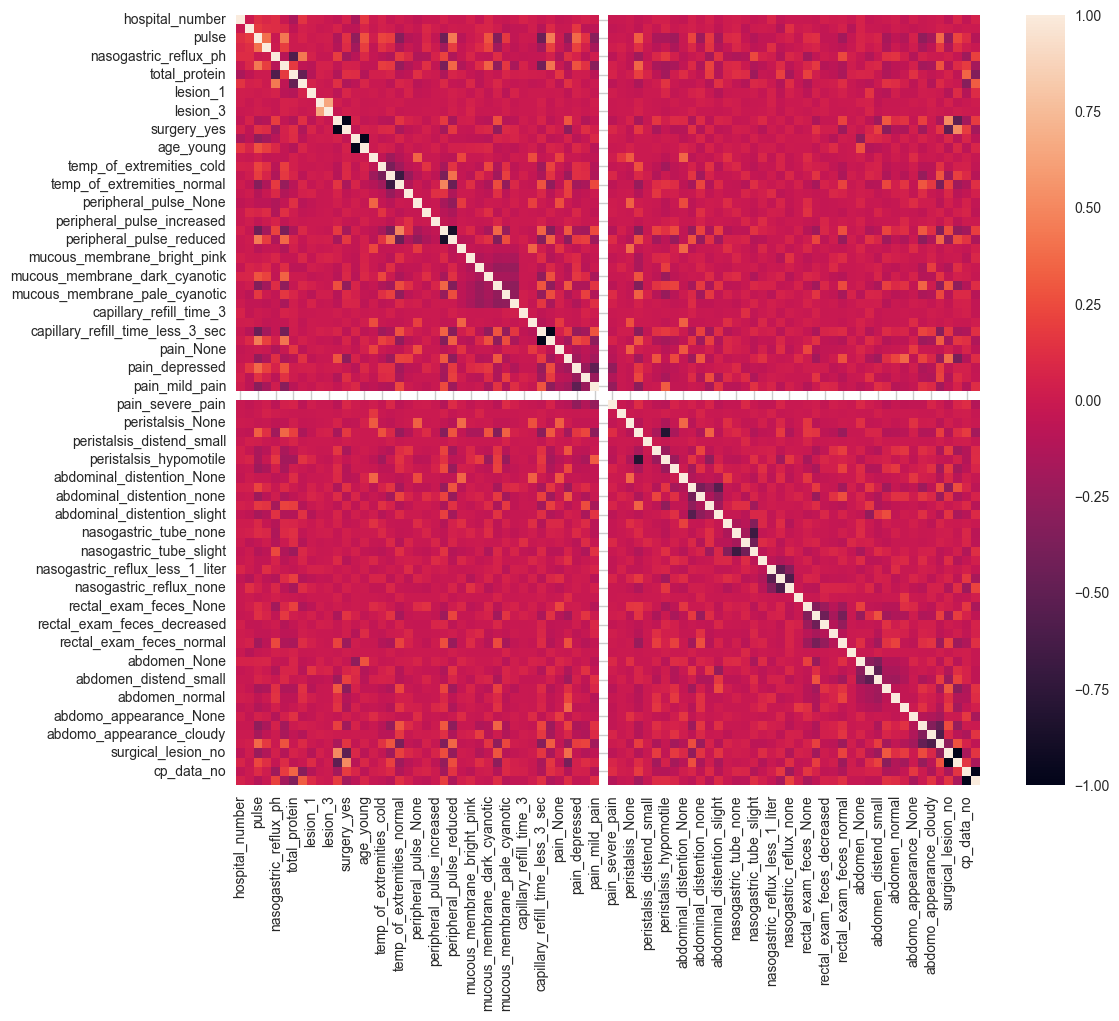

In [31]:
X_train = df_dum_train.drop(["outcome"], axis=1)

cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor)
plt.show()

In [42]:
def correlation(dataset, threshold):
    cor_columns = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                print(f"{dataset.columns[i]} -> {dataset.columns[j]}")
                name = dataset.columns[i]
                cor_columns.add(name)

    return cor_columns

cor_columns = correlation(X_train, 0.8)
cor_columns

surgery_yes -> surgery_no
age_young -> age_adult
peripheral_pulse_reduced -> peripheral_pulse_normal
capillary_refill_time_more_3_sec -> capillary_refill_time_less_3_sec
peristalsis_hypomotile -> peristalsis_absent
surgical_lesion_yes -> surgical_lesion_no
cp_data_yes -> cp_data_no


{'age_young',
 'capillary_refill_time_more_3_sec',
 'cp_data_yes',
 'peripheral_pulse_reduced',
 'peristalsis_hypomotile',
 'surgery_yes',
 'surgical_lesion_yes'}

In [44]:
from sklearn.feature_selection import chi2

df_dum_dorped = df_dum_train.drop(cor_columns, axis=1)

chi_y_train = df_dum_dorped["outcome"]

chi_x_train = df_dum_dorped.drop("outcome", axis=1)

chi_x_train_median_fill = chi_x_train.fillna(chi_x_train.median())

# Calculating Fscore and p value
f_p_values = chi2(chi_x_train_median_fill,chi_y_train)

p_values = pd.DataFrame()
p_values["column"] = chi_x_train.columns
p_values["p_value"] = f_p_values[1]
p_values["f_value"] = f_p_values[0]


p_values = p_values.sort_values(by="f_value", ascending=False).reset_index(drop=True)
p_values.head()

,column,p_value,f_value
0,hospital_number,0.0,5.434348e+07
1,lesion_2,0.0,1.303311e+04
2,lesion_1,0.0,9.771539e+03
3,total_protein,0.0,9.140804e+03
4,lesion_3,0.0,3.392899e+03


In [50]:
features = list(p_values["column"][:40])
features

['hospital_number',
 'lesion_2',
 'lesion_1',
 'total_protein',
 'lesion_3',
 'pulse',
 'respiratory_rate',
 'packed_cell_volume',
 'nasogastric_reflux_ph',
 'peripheral_pulse_normal',
 'temp_of_extremities_normal',
 'mucous_membrane_normal_pink',
 'pain_alert',
 'pain_mild_pain',
 'abdomo_appearance_clear',
 'abdomo_appearance_serosanguious',
 'surgical_lesion_no',
 'pain_extreme_pain',
 'abdomo_protein',
 'rectal_exam_feces_None',
 'pain_severe_pain',
 'peristalsis_absent',
 'mucous_membrane_pale_cyanotic',
 'abdominal_distention_severe',
 'cp_data_no',
 'abdomen_firm',
 'capillary_refill_time_less_3_sec',
 'abdominal_distention_none',
 'rectal_exam_feces_absent',
 'pain_None',
 'temp_of_extremities_cool',
 'peristalsis_hypermotile',
 'abdominal_distention_None',
 'abdominal_distention_slight',
 'mucous_membrane_dark_cyanotic',
 'abdominal_distention_moderate',
 'pain_depressed',
 'abdomen_other',
 'surgery_no',
 'peripheral_pulse_None']

In [51]:
df_filtered_dum_test = df_dum_test[features]

df_filtered_dum_train = df_dum_train[features + ["outcome"]]

In [52]:
FS_2_best_model = get_pycaret_model(df_filtered_dum_train, "outcome")

,Description,Value
0,Session id,123
1,Target,outcome
2,Target type,Multiclass
3,Original data shape,"(1235, 41)"
4,Transformed data shape,"(1235, 41)"
5,Transformed train set shape,"(864, 41)"
6,Transformed test set shape,"(371, 41)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7107,0.8560,0.7107,0.7119,0.7096,0.5394,0.5404,0.4340
gbc,Gradient Boosting Classifier,0.7025,0.8482,0.7025,0.7040,0.7016,0.5271,0.5285,0.0780
rf,Random Forest Classifier,0.6990,0.8474,0.6990,0.7042,0.6978,0.5196,0.5220,0.0400
et,Extra Trees Classifier,0.6840,0.8413,0.6840,0.6848,0.6804,0.4939,0.4965,0.0340
ridge,Ridge Classifier,0.6759,0.0000,0.6759,0.6775,0.6724,0.4813,0.4842,0.0060
ada,Ada Boost Classifier,0.6759,0.7939,0.6759,0.6768,0.6743,0.4833,0.4851,0.0180
lda,Linear Discriminant Analysis,0.6759,0.8331,0.6759,0.6768,0.6737,0.4836,0.4858,0.0060
dt,Decision Tree Classifier,0.5983,0.6793,0.5983,0.5968,0.5969,0.3621,0.3625,0.0060
knn,K Neighbors Classifier,0.5868,0.7316,0.5868,0.5949,0.5855,0.3450,0.3479,0.1580
qda,Quadratic Discriminant Analysis,0.4780,0.7558,0.4780,0.6716,0.4243,0.2115,0.2920,0.0080
